## 1) Modules

In [1]:
from lib import *
from make_test_image import *
from sift import *
from resift import *
from image_matching import *

## 2) Image Input and preprocessing

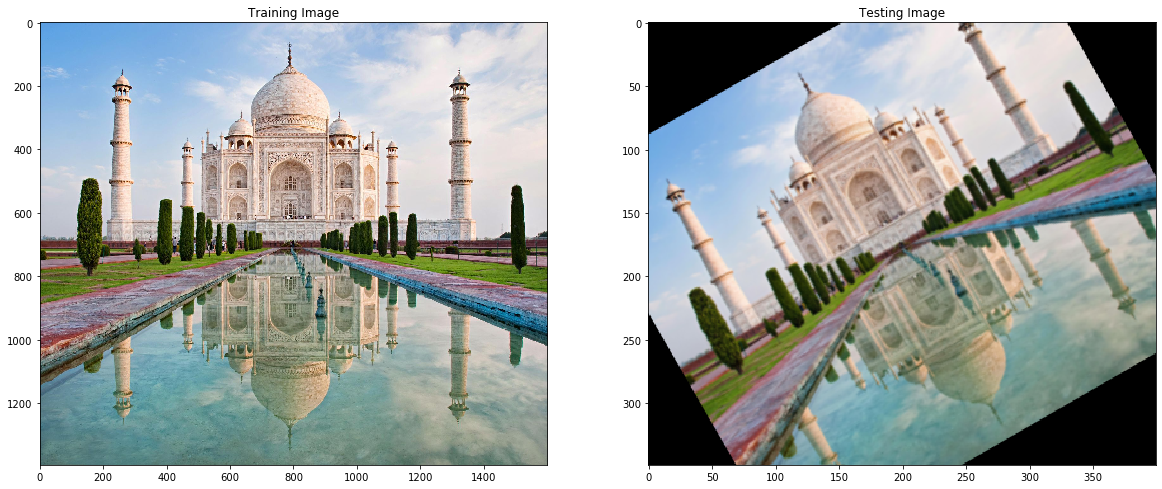

In [2]:
"""
This part of code is common to both the SIFT and reSIFT implementation on images, 
This part contains taking input and transforming image to make it test image.  
"""
image = cv2.imread('ex1.jpg')

# Convert the training image to RGB
training_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

test_image,test_gray=make_test_image(training_image)
# Display traning image and testing image
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(training_image)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)

## 3) SIFT Algorithm

### 3.1) Implementing SIFT Algorithm

Number of Keypoints Detected In The Training Image:  11657
Number of Keypoints Detected In The Query Image:  1114


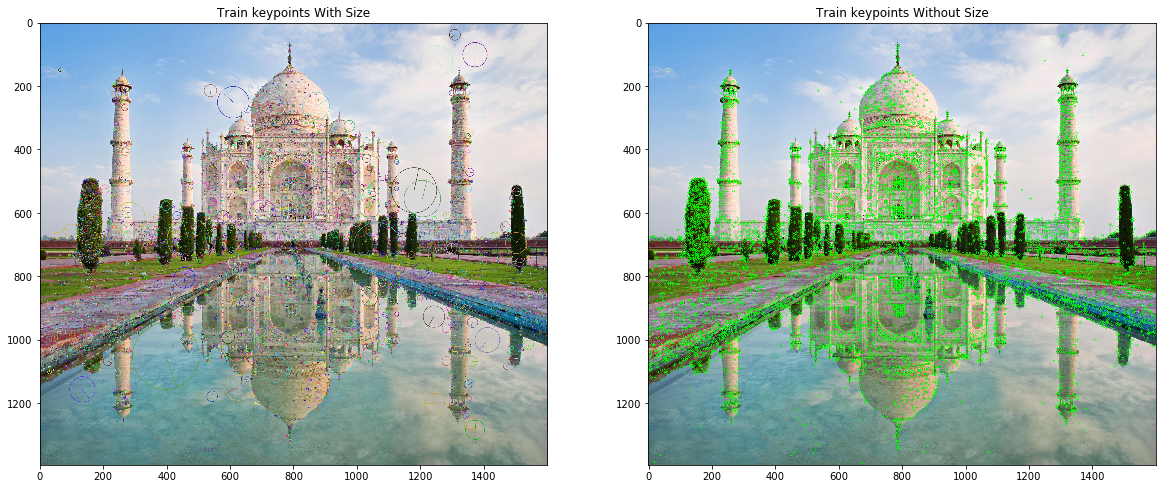

In [3]:
keypoints_with_size,keypoints_without_size,train_descriptor,train_keypoints,test_descriptor,test_keypoints = SIFT_algo(training_image,training_gray,test_image,test_gray)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))

### 3.2) Train and test image matching

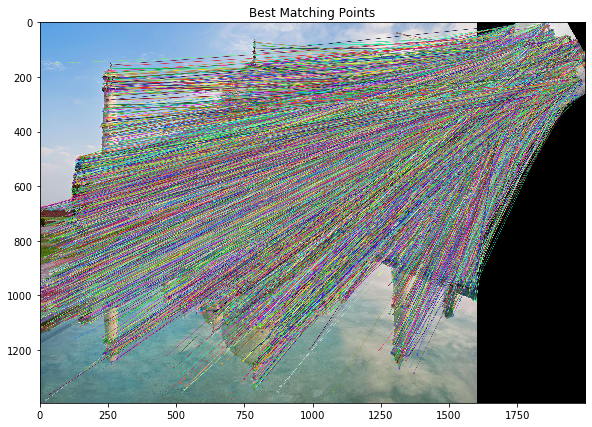


Number of Matching Keypoints Between The Training and Query Images:  11657


In [4]:
"""
# Create a Brute Force Matcher object.
# Perform the matching between the SIFT descriptors of the training image and the test image
# The matches with shorter distance are the ones we want.
"""

result,matches=Image_matching(train_descriptor,train_keypoints,training_image,test_descriptor,test_keypoints,test_gray)

# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

## 4) reSIFT Algorithm

### 4.1) Details of Algorithm

The reSIFT implementation require 4 steps in addition to SIFT implementation <br>
1) A smoothening operation<br>
2) A color domain transformation<br>
3) A normalization operation<br>
4) A spatial residual calculation<br>

### 4.2) reSIFT implementation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


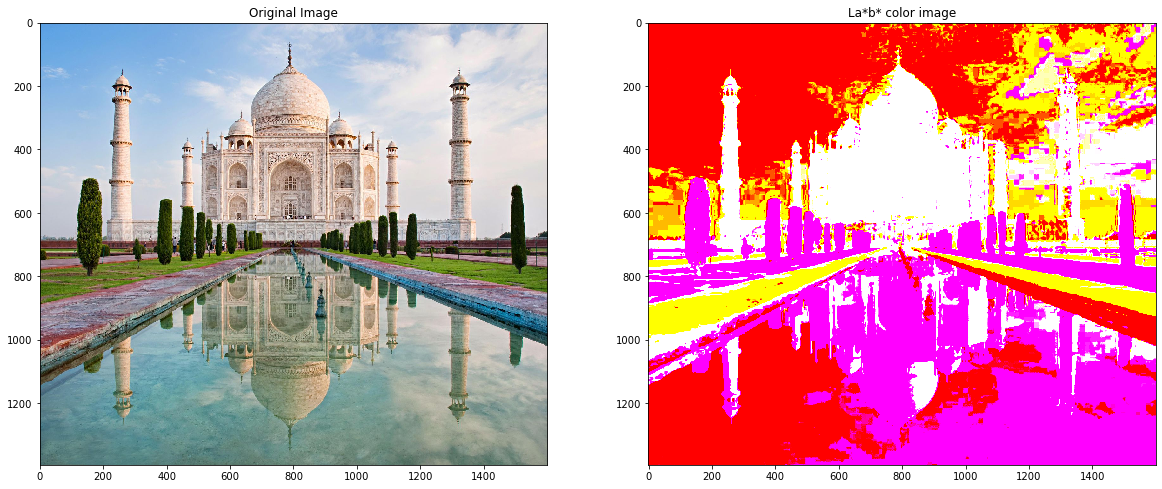

In [5]:
lab=Smoothening_Transformation(training_image)

# Display original image and La*b* image
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Original Image")
plots[0].imshow(training_image)

plots[1].set_title("La*b* color image")
plots[1].imshow(lab)

Number of Keypoints Detected In The Training Image:  1852
Number of Keypoints Detected In The Query Image:  1114


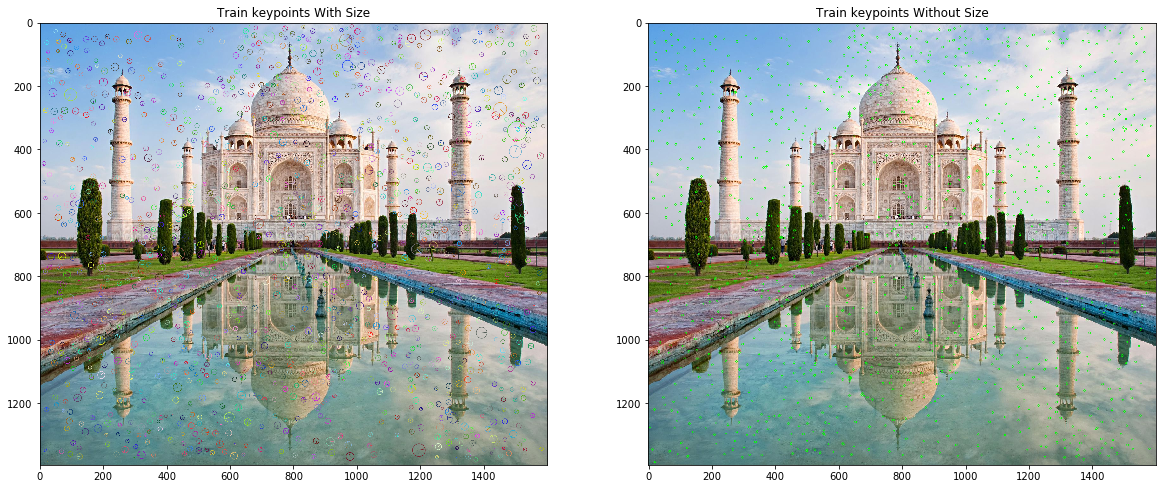

In [6]:
pool_image = Normalise_ResidualCalc(lab)
"""
Output of Normalise_ResidualCalc() function is given instead of training gray 
as reliability-weighted lightness map decide the descriptor

"""

keypoints_with_size,keypoints_without_size,train_descriptor,train_keypoints,test_descriptor,test_keypoints=SIFT_algo(training_image,pool_image,test_image,test_gray)



# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))


### 4.3) Train and test image matching

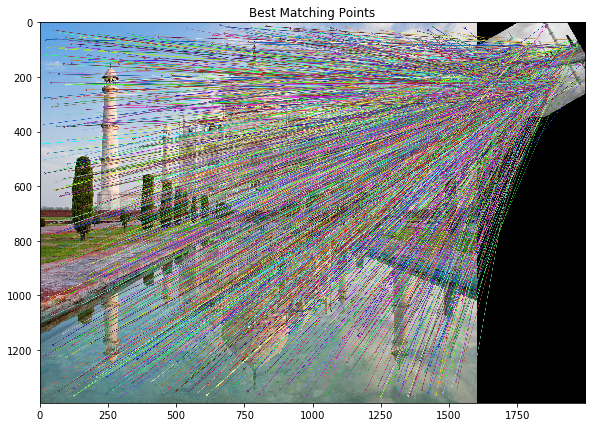


Number of Matching Keypoints Between The Training and Query Images:  1852


In [7]:
# Create a Brute Force Matcher object.
# Perform the matching between the reSIFT descriptors of the training image and the test image
# The matches with shorter distance are the ones we want.
result,matches = Image_matching(train_descriptor,train_keypoints,training_image,test_descriptor,test_keypoints,test_gray)


# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

## 5) Conclusion

SIFT algorithm calculated descriptors from gray scale image.<br>
While reSIFT algorithm descriptors from reliability-weighted lightness map.<br>
The reliability-weighted lightness map is calculated using 4 functions <br>
i) Smoothening_Transformation(training_image)<br>
ii) Normalise_ResidualCalc(lab)<br>
iii) SIFT_algo(training_image,pool_image,test_image,test_gray)<br>
iv) Image_matching(train_descriptor,train_keypoints,training_image,test_descriptor,test_keypoints,test_gray)<br>